<a href="https://colab.research.google.com/github/AparnaRameshA95/Assigmnents/blob/main/Aparna_Ramesh_A_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data set
df = pd.read_csv('/content/Wine_clust  (1).csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


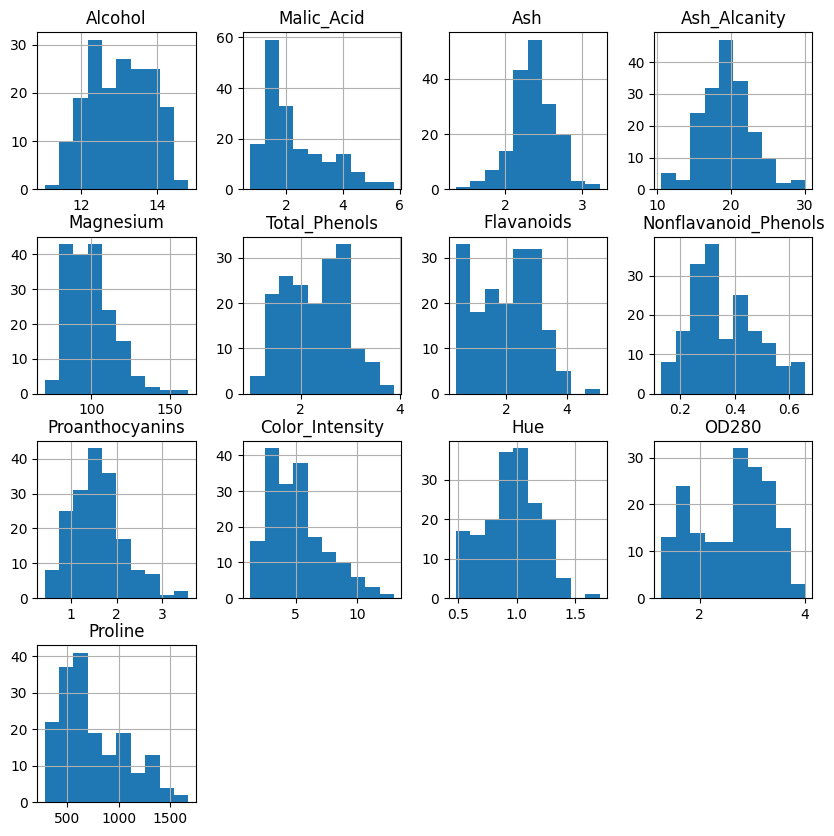

In [6]:
# Frequency graph for identify data distribution
df.select_dtypes(include=['float','int']).hist(figsize=(10,10))
plt.show()

In [7]:
# Checking missing values
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


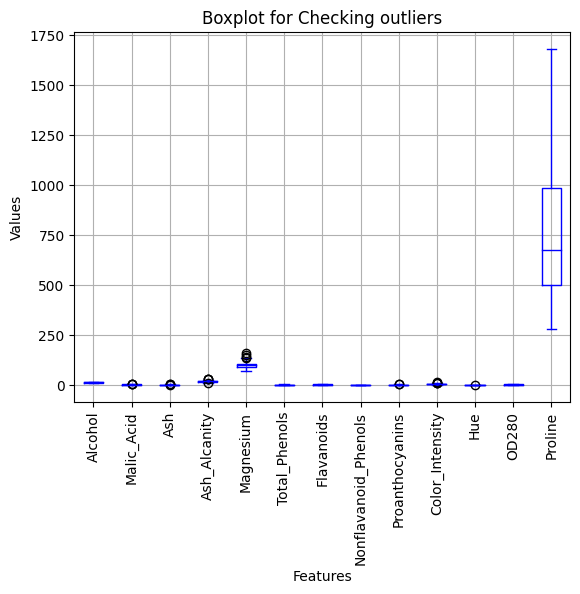

In [8]:
# Outlier checking
df.boxplot(color='blue')
plt.title('Boxplot for Checking outliers')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

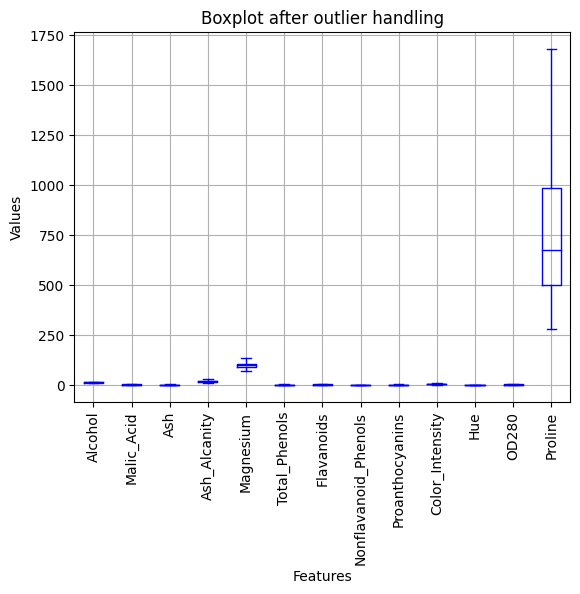

In [9]:
# IQR method for outlier handling
cols = ['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins','Color_Intensity','Hue']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
outlier_lower = df[cols]<(Q1 - 1.5 * IQR)
outlier_upper = df[cols]>(Q3 + 1.5 * IQR)

#Clip the outliers and update the original DataFrame
capped_data=df[cols].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR,axis=1)
df.update(capped_data)

df.boxplot(color='blue')
plt.title('Boxplot after outlier handling')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [10]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Convert back to a DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

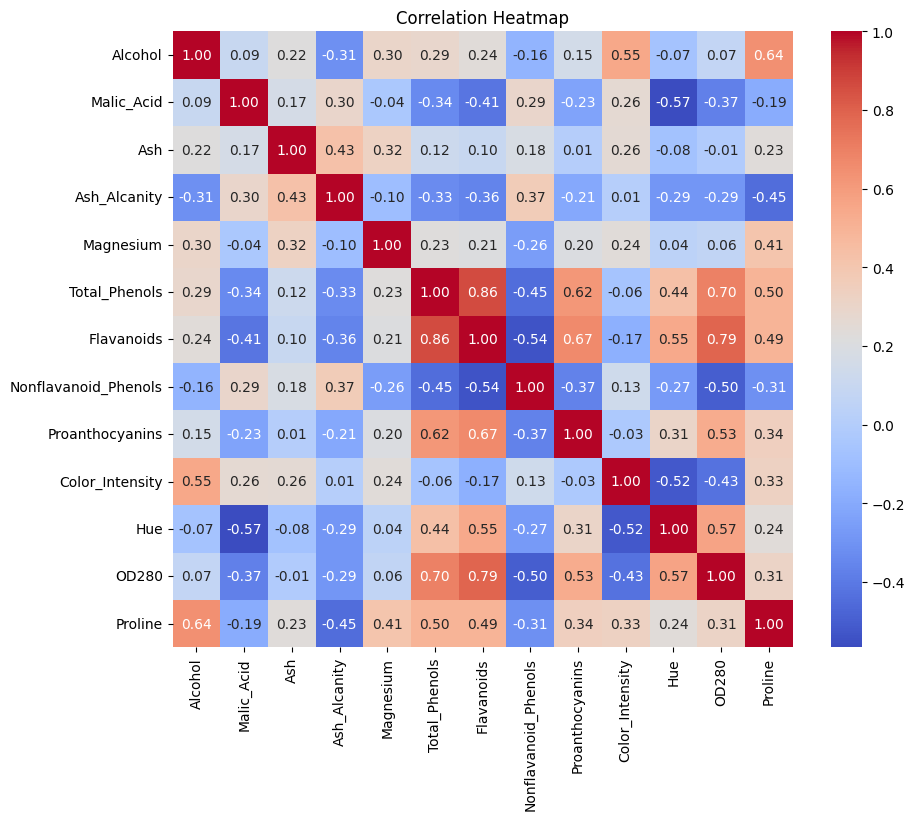

In [11]:
# Heatmap to check correlations
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### **K-Means Clustering**

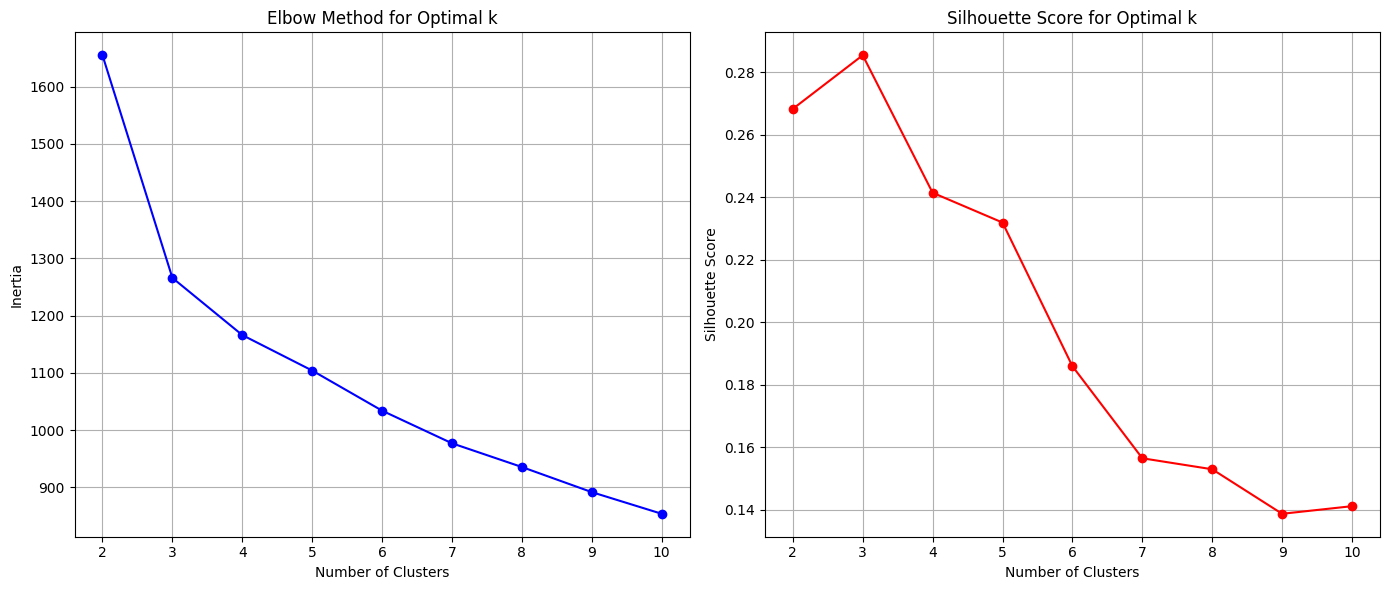

In [12]:
# Finding the number of clusters for K-Means
inertia = []
sil_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range_clusters, sil_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# Implementing K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Adding the cluster labels to the original dataset
df['KMeans_Cluster'] = kmeans_labels
df['KMeans_Cluster'].value_counts()

,count
KMeans_Cluster,
0,65
2,62
1,51


### **Agglomerative Clustering**

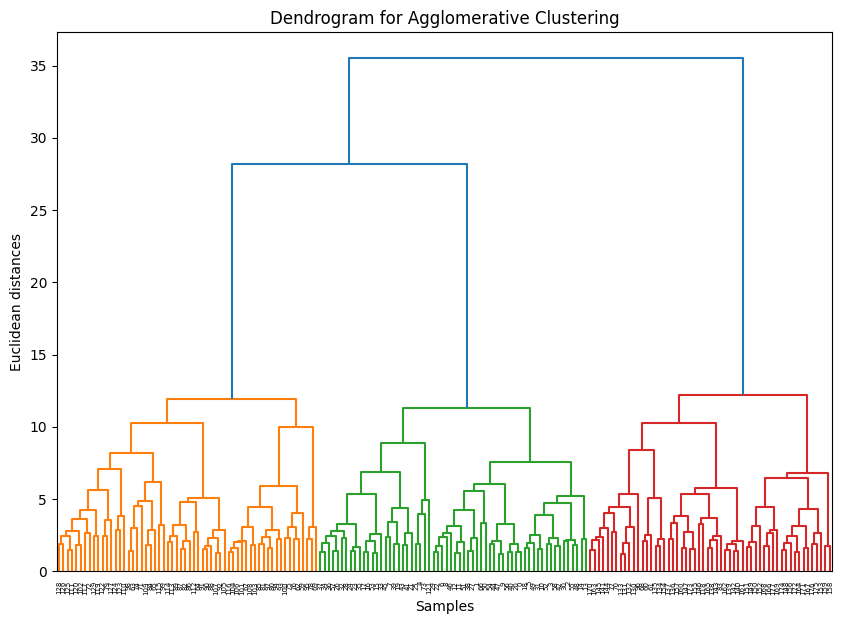

In [14]:
# Performing Agglomerative Clustering
linked = linkage(scaled_df, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

### **DBSCAN Clustering**

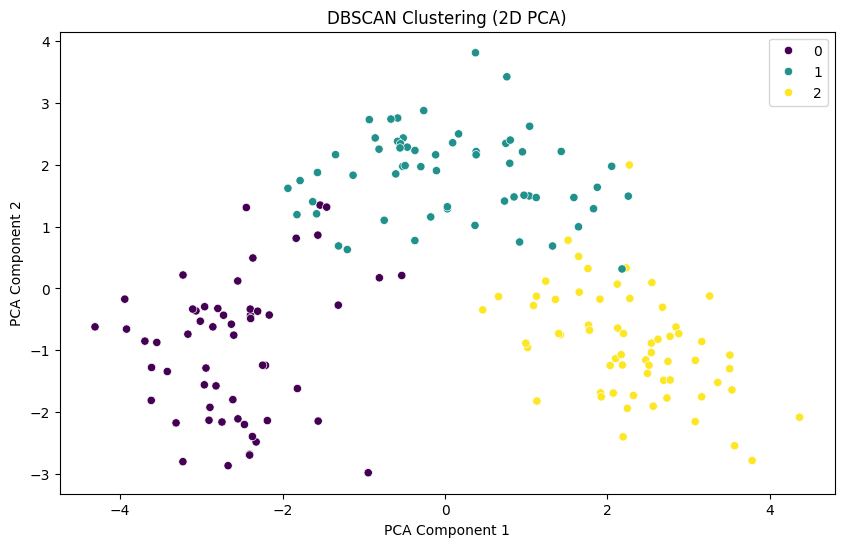

In [15]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add the cluster labels to the DataFrame
scaled_df['Cluster'] = dbscan_labels

# Reduce the dimensionality for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
labels = agglomerative.fit_predict(scaled_df)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [16]:
X_pca

array([[ 3.35814747, -1.52022185],
       [ 2.22921481,  0.33326137],
       [ 2.54005743, -1.03695315],
       [ 3.78112387, -2.78256636],
       [ 1.0168718 , -0.95522507],
       [ 3.08026004, -2.15271868],
       [ 2.47175534, -1.15588494],
       [ 2.07139203, -1.69122109],
       [ 2.5404551 , -0.88388492],
       [ 2.7705213 , -0.77465343],
       [ 3.50454254, -1.29825486],
       [ 1.76782977, -0.59334871],
       [ 2.12641571, -0.64066595],
       [ 3.50743925, -1.07718241],
       [ 4.36509305, -2.08205163],
       [ 2.31969491, -1.73051508],
       [ 2.19278384, -2.39898401],
       [ 1.91419793, -1.68803619],
       [ 3.56547932, -2.54269597],
       [ 2.10061549, -1.13359555],
       [ 3.16121117, -0.85855442],
       [ 1.08878128, -0.27649763],
       [ 2.546886  ,  0.0950889 ],
       [ 1.64499405,  0.51783793],
       [ 1.75967664,  0.32172373],
       [ 0.99495299, -0.88450159],
       [ 1.77823915, -0.67459581],
       [ 1.24000733,  0.11819183],
       [ 2.19788178,

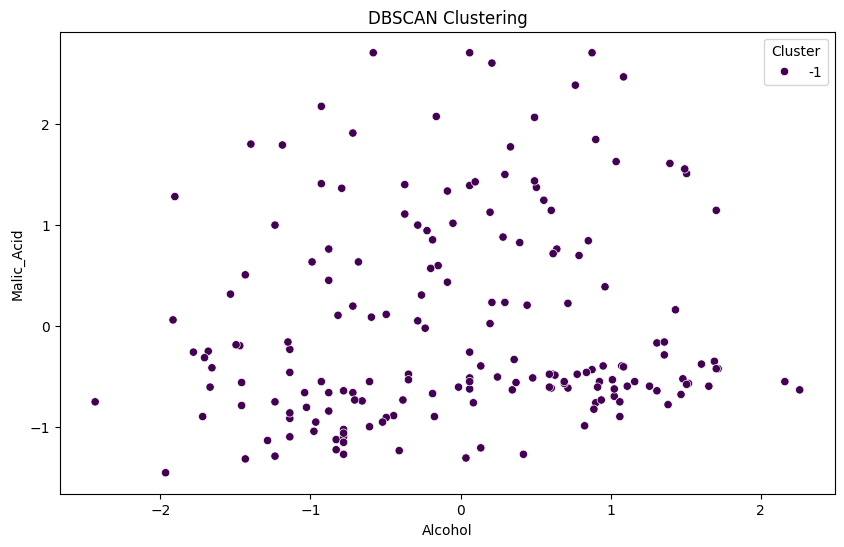

In [17]:
# Plot the clusters
plt.figure(figsize=(10, 6))

sns.scatterplot(x=scaled_df['Alcohol'],y=scaled_df['Malic_Acid'],hue=scaled_df['Cluster'],palette='viridis',legend='full')
plt.title('DBSCAN Clustering')
plt.show()